# Random Forest

Use of Random Forest Regressor for wine quality

## 01. Import Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
#for scaling, transforming and wrangling data 

sns.set()

### 01.01. family model

In [2]:
from sklearn.ensemble import RandomForestRegressor

### 01.02. cross-validation libraries

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### 01.03. metrics libraries

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

### 01.04. saving model

In [7]:
import joblib

## 02. Load data

In [12]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url,sep = ";")

In [13]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
data.shape

(1599, 12)

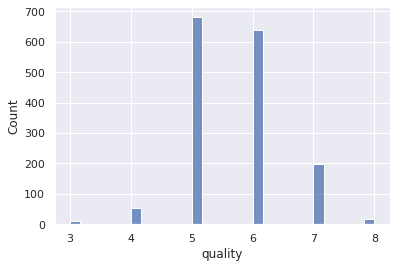

In [22]:
sns.histplot(data.quality)

## 03. Split Data

In [31]:
y = data.quality
X = data.drop('quality',axis = 1)

Stratify your sample by the target variable 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.2,
                                                 random_state = 123,
                                                 stratify = y)

## 04. Standardization

### 04.01. training data

In [34]:
#fitting the transformer API
scaler = preprocessing.StandardScaler().fit(X_train)

In [37]:
#applying tthe transformation to the training data
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled.mean(axis = 0))

print(X_train_scaled.std(axis = 0))

[ 1.16664562e-16 -3.05550043e-17 -8.47206937e-17 -2.22218213e-17
  2.22218213e-17 -6.38877362e-17 -4.16659149e-18 -2.54439854e-15
 -8.70817622e-16 -4.08325966e-16 -1.17220107e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 04.02. testing data 

In [38]:
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled.mean(axis = 0))

print(X_test_scaled.std(axis = 0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[1.02160495 1.00135689 0.97456598 0.91099054 0.86716698 0.94193125
 1.03673213 1.03145119 0.95734849 0.83829505 1.0286218 ]


### 04.03. Pipeline 

Modeling pipeline that first transform the data using StandardScaler() and then gits a model using a Random Forest Regressor

In [39]:
pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestRegressor())

## 05. Hyperparameters

### 05.01. List of hyperparameters

In [40]:
pipeline.get_params()

{'memory': None,
 'randomforestregressor': RandomForestRegressor(),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'step

### 05.02. hyperparameters for tuning in cross-validation

In [41]:
hyperparameters = {
    'randomforestregressor__max_features': ["auto", "sqrt", "log2"],
    'randomforestregressor__max_depth': [None, 5, 10],
    'randomforestregressor__n_estimators': [100,150,200],
}

## 06. CrossValidation for choosing hyperparameters

The best practice when performing CV is to include your data preprocessing steps inside the cross-validation loop. This prevents accidentally tainting your training folds with influential data from your test fold.

### 06.01. GridSearchCV for choosing hyperparameters

Use of a pipeline

In [44]:
clf = GridSearchCV(pipeline,hyperparameters,cv = 10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 10],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                         'randomforestregressor__n_estimators': [100, 150,
                                                                 200]})

In [45]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 100}

## 07. Refit on the entire training set

After finding the best hyperparameters with cross-validation, we get a performance improvement by refitting the model on the entire training set

In [46]:
#usually this funcionality is already ON with GridSearchCV
clf.refit

True

## 08. Evaluate on test data

In [47]:
y_pred = clf.predict(X_test)

In [49]:
r2_score(y_test,y_pred)

0.4565002724135845

In [50]:
mean_squared_error(y_test,y_pred)

0.3507059375

## 09. Save model and reuse it

In [51]:
joblib.dump(clf,'rf.plk')

['rf.plk']

In [52]:
clf2 = joblib.load('rf.plk')
y_pred2 = clf2.predict(X_test)
r2_score(y_test,y_pred2)

0.4565002724135845